In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
files = ['jan.csv', 'feb.csv', 'mar.csv', 'apr.csv',
         'may.csv', 'jun.csv', 'jul.csv', 'aug.csv',
         'sep.csv', 'oct.csv', 'nov.csv', 'dec.csv']

In [4]:
df_list = [pd.read_csv(f'./data/{f}') for f in files]
df_year = pd.concat(df_list, ignore_index=True)


In [5]:
df_year

,category,minimum,maximum
0,1.1.2012,7,11.7
1,2.1.2012,5,7.1
2,3.1.2012,7,11.6
3,4.1.2012,6,9.8
4,5.1.2012,7,11.5
...,...,...,...
361,27.12.2012,5,8.4
362,28.12.2012,6,12.1
363,29.12.2012,5,11.8
364,30.12.2012,5,10.7


Compute Average Daily Temperature

In [7]:
df_year['avg'] = (df_year['minimum'] + df_year['maximum'])/2

Convert to Date Time format

In [8]:
df_year['category'] = pd.to_datetime(df_year['category'], format='%d.%m.%Y')

Save to new csv file

In [11]:
df_year.to_csv('2012_temp.csv')

### Plotting Daily data

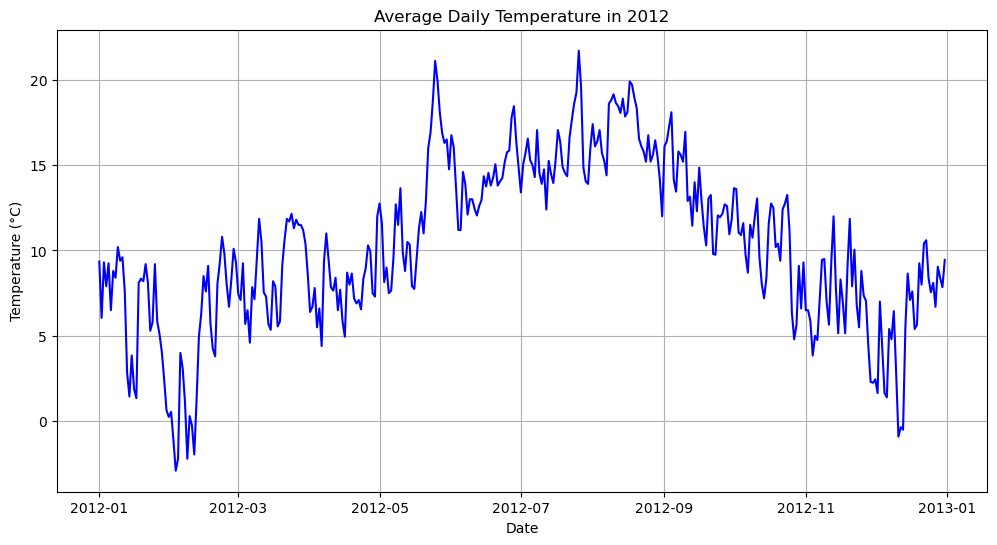

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(df_year['category'], df_year['avg'], label='Average Temperature', color='b')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Average Daily Temperature in 2012')
plt.grid(True)
plt.show()

### Plotting Weekly data

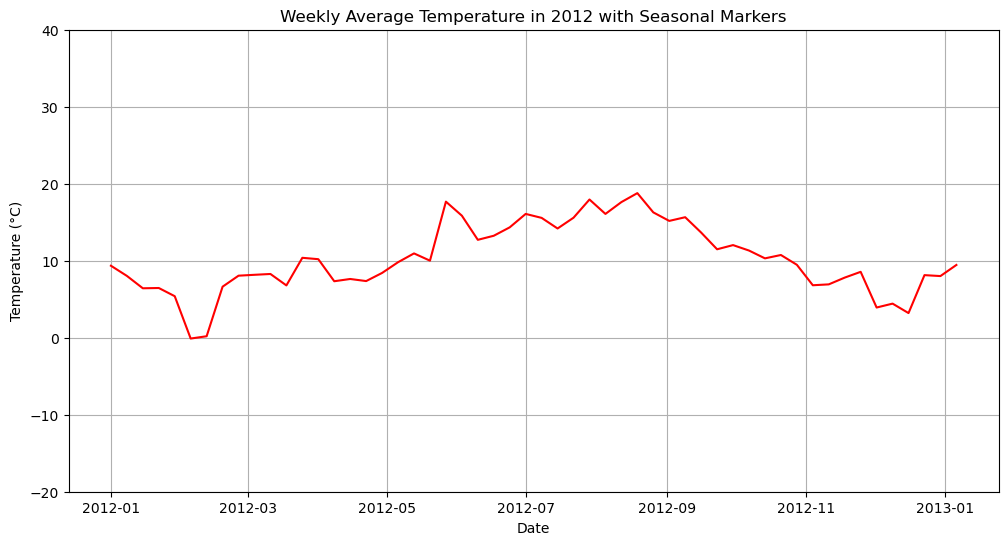

In [12]:
df_weekly = df_year.set_index('category').resample('W').mean()

plt.figure(figsize=(12, 6))
plt.plot(df_weekly.index, df_weekly['avg'], label='Weekly Average Temperature', color='r')

plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Weekly Average Temperature in 2012 with Seasonal Markers')
plt.ylim(-20, 40)
plt.grid(True)
plt.show()